
INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SANTA CATARINA
CAMPUS FLORIANÓPOLIS
DEPARTAMENTO ACADÊMICO DE ELETRÔNICA
ENGENHARIA ELETRÔNICA

Estudante: Marcelo Brancalhão Gaspar

## Objetivo do trabalho final de DSP2 2022:

Usando a biblioteca dlib para reconhecer os rostos das pessoas na imagem e borrar seus rostos, usando a esp32-cam para capturar as imagens. 




In [1]:
! pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
! pip install dlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
! pip install cvt

Defaulting to user installation because normal site-packages is not writeable


In [4]:
! pip install imutils

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Import required libraries
import cv2
import numpy as np
import dlib
import urllib.request
import imutils
from imutils import face_utils
import matplotlib.pyplot as plt

## Reconhecimento de rosto em fotos




###### O get_frontal_face_detector retorna o detector facial pré-treinado HOG + Linear SVM incluído na biblioteca dlib. O detector facial HOG + Linear SVM da Dlib é rápido e eficiente, por isso foi escolhido para ser utilizado no projeto com a ESP32 CAM

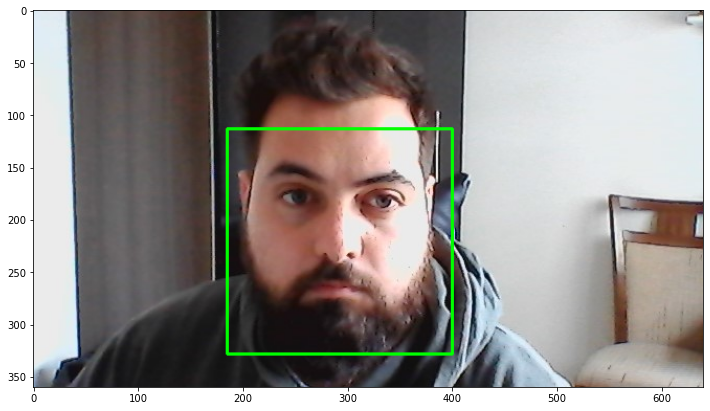

In [6]:
frame = cv2.cvtColor(cv2.imread("rosto.jpg"), cv2.COLOR_BGR2RGB)
detector = dlib.get_frontal_face_detector()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

faces = detector(gray)
    # detected face in faces array
for face in faces:
  x1 = face.left()
  y1 = face.top()
  x2 = face.right()
  y2 = face.bottom()


x, y = face.left(), face.top()
x1, y1 = face.right(), face.bottom()
image = cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)

plt.figure(figsize=(12, 12))
plt.imshow(frame)

## Varios Rostos

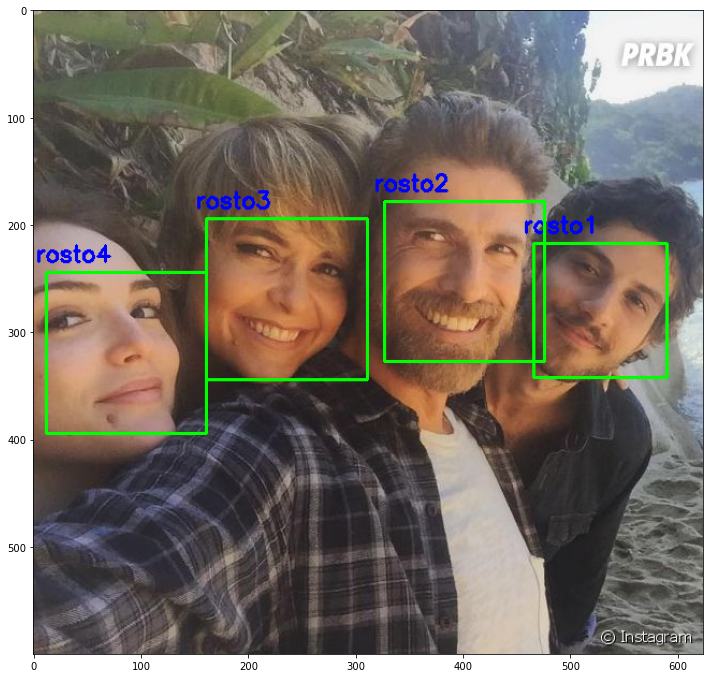

In [7]:
frame = cv2.cvtColor(cv2.imread("pessoas1.jpg"), cv2.COLOR_BGR2RGB)
detector = dlib.get_frontal_face_detector()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

i = 0
for face in faces:
    x, y = face.left(), face.top()
    x1, y1 = face.right(), face.bottom()
    image = cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
    #image[y:y+y1-y, x:x+x1-x] = cv2.medianBlur(image[y:y+y1-y, x:x+x1-x],25)
    # Increment iterator for each face in faces
    i = i+1
    
    # Display the box and faces
    cv2.putText(frame, 'rosto'+str(i), (x-10, y-10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

plt.figure(figsize=(12, 12))
plt.imshow(frame)

## Borrar rostos

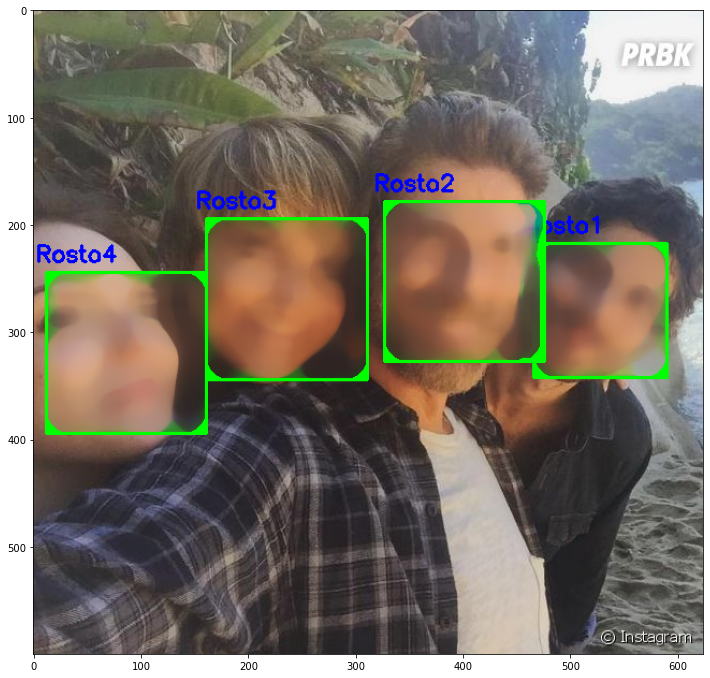

In [8]:
frame = cv2.cvtColor(cv2.imread("pessoas1.jpg"), cv2.COLOR_BGR2RGB)
detector = dlib.get_frontal_face_detector()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = detector(gray)

i = 0
for face in faces:
    x, y = face.left(), face.top()
    x1, y1 = face.right(), face.bottom()
    image = cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
    image[y:y+y1-y, x:x+x1-x] = cv2.medianBlur(image[y:y+y1-y, x:x+x1-x],25)
    # Increment iterator for each face in faces
    i = i+1
    
    # Display the box and faces
    cv2.putText(frame, 'Rosto'+str(i), (x-10, y-10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

plt.figure(figsize=(12, 12))
plt.imshow(frame)

## Reconhecendo rostos com a ESP 32 Cam

[(-65, 15) (134, 194)] 1
[(-65, 15) (134, 194)] 1
[(-65, 15) (134, 194)] 1
[(-65, 15) (134, 194)] 1
[(-38, 29) (128, 178)] 1
[(29, 62) (178, 211)] 1
[(93, 107) (217, 231)] 1
[(95, 95) (244, 244)] 1
[(95, 95) (244, 244)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1
[(120, 120) (245, 245)] 1


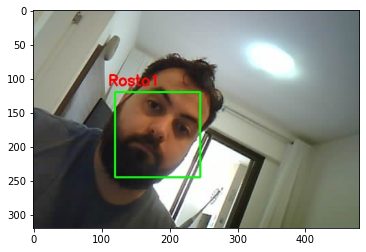

In [9]:
cap='http://192.168.4.1/capture' # para usar ESP32-CAM
#cap = cv2.VideoCapture(0)
detector = dlib.get_frontal_face_detector()

while True:

# Captura frame a frame
    img_resp=urllib.request.urlopen(cap)
    imgnp=np.array(bytearray(img_resp.read()),dtype=np.uint8)
    frame=cv2.imdecode(imgnp,-1)
    #ret, frame = cap.read()
    #frame = cv2.flip(frame, 1)

    # RGB para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    # I conta as faces
    i = 0
    for face in faces:

        # Pega as coordenadas do rosto e borra o rosto
        x, y = face.left(), face.top()
        x1, y1 = face.right(), face.bottom()
        image = cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)

        #Incrementa ao reconhecer cada rosto
        i = i+1

        # Display the box and faces
        cv2.putText(frame, 'Rosto'+str(i), (x-10, y-10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        print(face, i)


    # Display the resulting frame
    cv2.imshow('ESP32 - Cam', frame)

    # Fecha a janela e grava o ultimo frame 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


# Release the capture and destroy the windows
cv2.imwrite('Rosto_ESP32.jpg', frame)
frame = cv2.cvtColor(cv2.imread("Rosto_ESP32.jpg"), cv2.COLOR_BGR2RGB);
plt.imshow(frame)
#cap.release()
cv2.destroyAllWindows()


## Reconhecendo e aplicando o medianBlur com a ESP 32 Cam

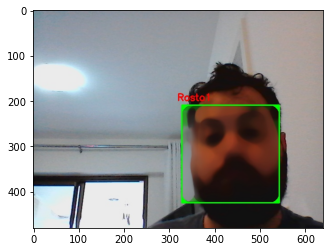

In [10]:
#cap='http://192.168.4.1/capture' # para usar ESP32-CAM
cap = cv2.VideoCapture(0)

detector = dlib.get_frontal_face_detector()

while True:

# Captura frame a frame
    #img_resp=urllib.request.urlopen(cap)
    #imgnp=np.array(bytearray(img_resp.read()),dtype=np.uint8)
    #frame=cv2.imdecode(imgnp,-1)
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)

    # RGB para escala de cinza
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    # I conta as faces
    i = 0
    for face in faces:

        # Pega as coordenadas do rosto e borra o rosto
        x, y = face.left(), face.top()
        x1, y1 = face.right(), face.bottom()
        image = cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
        image[y:y+y1-y, x:x+x1-x] = cv2.medianBlur(image[y:y+y1-y, x:x+x1-x],25) #Borra o rosto dentro do quadrado

        #Incrementa ao reconhecer cada rosto
        i = i+1

        # Display the box and faces
        cv2.putText(frame, 'Rosto'+str(i), (x-10, y-10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)


    # Display the resulting frame
    cv2.imshow('frame', frame)

    # Fecha a janela e grava o ultimo frame 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


# Release the capture and destroy the windows
cv2.imwrite('Rosto_Blur_ESP32.jpg', frame)
frame = cv2.cvtColor(cv2.imread("Rosto_Blur_ESP32.jpg"), cv2.COLOR_BGR2RGB);
plt.imshow(frame)
cap.release()
cv2.destroyAllWindows()


## Conclusão

### Os resultados apresentados na detecção de rostos foram satisfatórios, como previsto o detector HOG consegue captar em tempo real, sendo bem preciso para distancias menores.